In [98]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from scipy import stats
import seaborn as sns
sns.set()

In [99]:
df = pd.read_csv(r'C:\Users\akayu\OneDrive\Desktop\diabetes.csv')

In [100]:
df.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [101]:
# Checking for values which have zero value
df.astype(bool).sum(axis=0)

Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     268
dtype: int64

In [102]:
#Dropped insulin column because it had more than half zero values
df.drop(["Insulin"],axis = 1,inplace=True)
df.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
5,5,116,74,0,25.6,0.201,30,0
6,3,78,50,32,31.0,0.248,26,1
7,10,115,0,0,35.3,0.134,29,0
8,2,197,70,45,30.5,0.158,53,1
9,8,125,96,0,0.0,0.232,54,1


# We see from the following graphs that BMI ,Blood Pressure , Glucose and skinthickness have zero values which they should not have in them

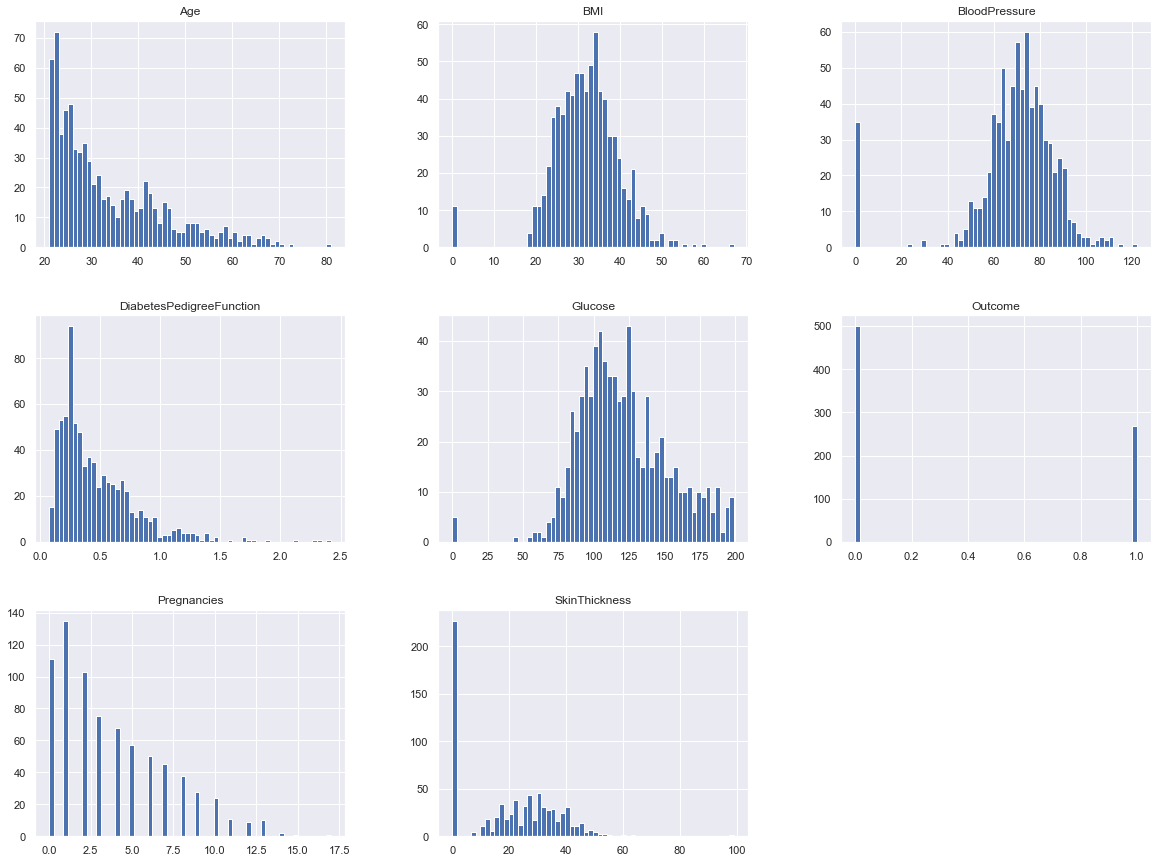

In [103]:
df.hist(bins=60, figsize=(20, 15))
plt.show()


# replacing the zero values with the median value in the required columns 

In [104]:
median_bmi = df['BMI'].median()
# Substitute it in the BMI column of the dataset where values are 0
df['BMI'] = df['BMI'].replace(0,median_bmi)

In [105]:
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
5,5,116,74,0,25.6,0.201,30,0
6,3,78,50,32,31.0,0.248,26,1
7,10,115,0,0,35.3,0.134,29,0
8,2,197,70,45,30.5,0.158,53,1
9,8,125,96,0,32.0,0.232,54,1


In [106]:
median = df['BloodPressure'].median()
# Substitute it in the BloodPressure column of the dataset where values are 0
df['BloodPressure'] = df['BloodPressure'].replace(0,median)

In [107]:
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
5,5,116,74,0,25.6,0.201,30,0
6,3,78,50,32,31.0,0.248,26,1
7,10,115,72,0,35.3,0.134,29,0
8,2,197,70,45,30.5,0.158,53,1
9,8,125,96,0,32.0,0.232,54,1


In [108]:
median = df['SkinThickness'].median()
# Substitute it in the SkinThickness column of the dataset where values are 0
df['SkinThickness'] = df['SkinThickness'].replace(0,median)

In [109]:
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,23,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
5,5,116,74,23,25.6,0.201,30,0
6,3,78,50,32,31.0,0.248,26,1
7,10,115,72,23,35.3,0.134,29,0
8,2,197,70,45,30.5,0.158,53,1
9,8,125,96,23,32.0,0.232,54,1


In [110]:
median = df['Glucose'].median()
# Substitute it in the Glucose column of the dataset where values are 0
df['Glucose'] = df['Glucose'].replace(0,median)

In [111]:
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,23,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
5,5,116,74,23,25.6,0.201,30,0
6,3,78,50,32,31.0,0.248,26,1
7,10,115,72,23,35.3,0.134,29,0
8,2,197,70,45,30.5,0.158,53,1
9,8,125,96,23,32.0,0.232,54,1


In [139]:
# Again checking for zero values
df.astype(bool).sum(axis=0)
# All the values are non zero

Pregnancies                 618
Glucose                     718
BloodPressure               718
SkinThickness               718
BMI                         718
DiabetesPedigreeFunction    718
Age                         718
Outcome                     244
dtype: int64

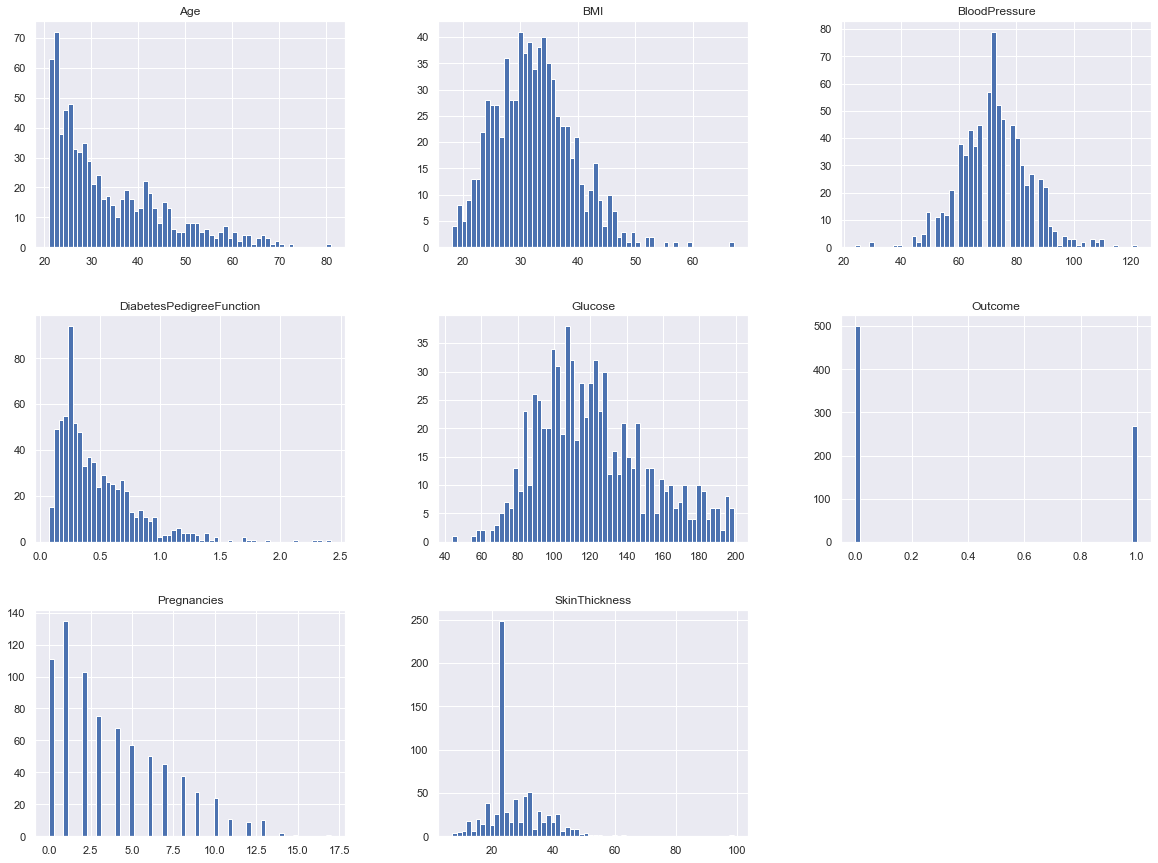

In [113]:
df.hist(bins=60, figsize=(20, 15))
plt.show()

# checking for outliers

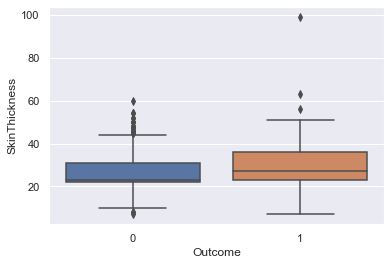

In [114]:
sns.boxplot(x=df.Outcome, y=df.SkinThickness)

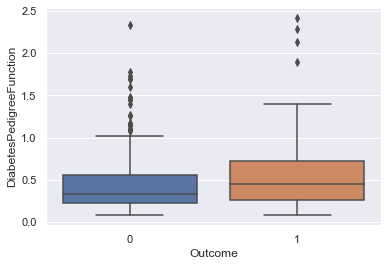

In [115]:
sns.boxplot(x=df.Outcome, y=df.DiabetesPedigreeFunction)

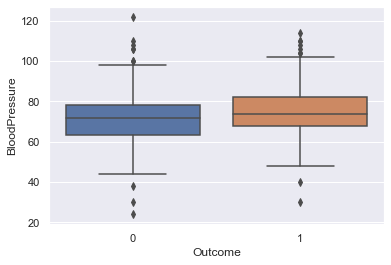

In [116]:
sns.boxplot(x=df.Outcome, y=df.BloodPressure)

# Removing Outliers using zscore function

In [120]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6      148             72             35  33.6   
1              1       85             66             29  26.6   
2              8      183             64             23  23.3   
3              1       89             66             23  28.1   
5              5      116             74             23  25.6   
..           ...      ...            ...            ...   ...   
763           10      101             76             48  32.9   
764            2      122             70             27  36.8   
765            5      121             72             23  26.2   
766            1      126             60             23  30.1   
767            1       93             70             31  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21 

# Results after removing the outliers 

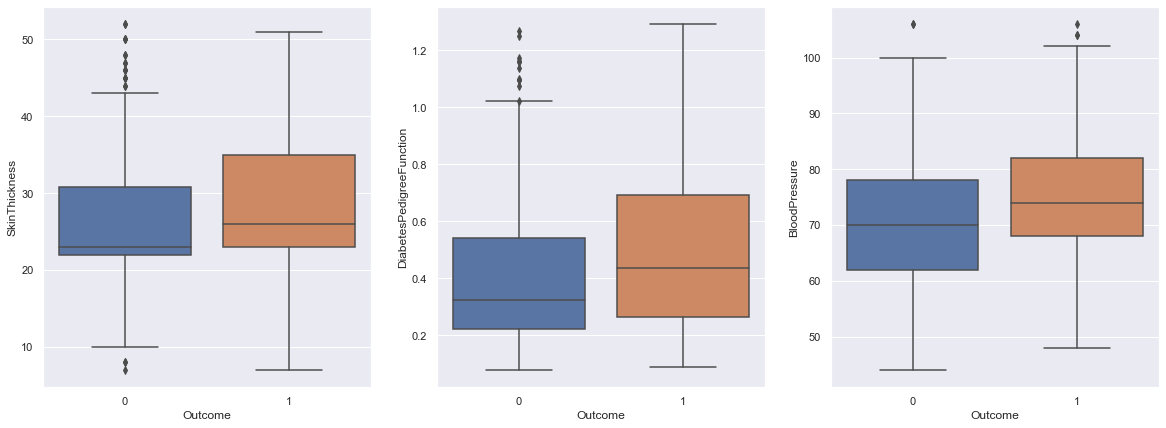

In [128]:
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(x=df.Outcome, y=df.SkinThickness)
plt.subplot(1,3,2)
sns.boxplot(x=df.Outcome, y=df.DiabetesPedigreeFunction)
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome, y=df.BloodPressure)


# Bivariate analysis

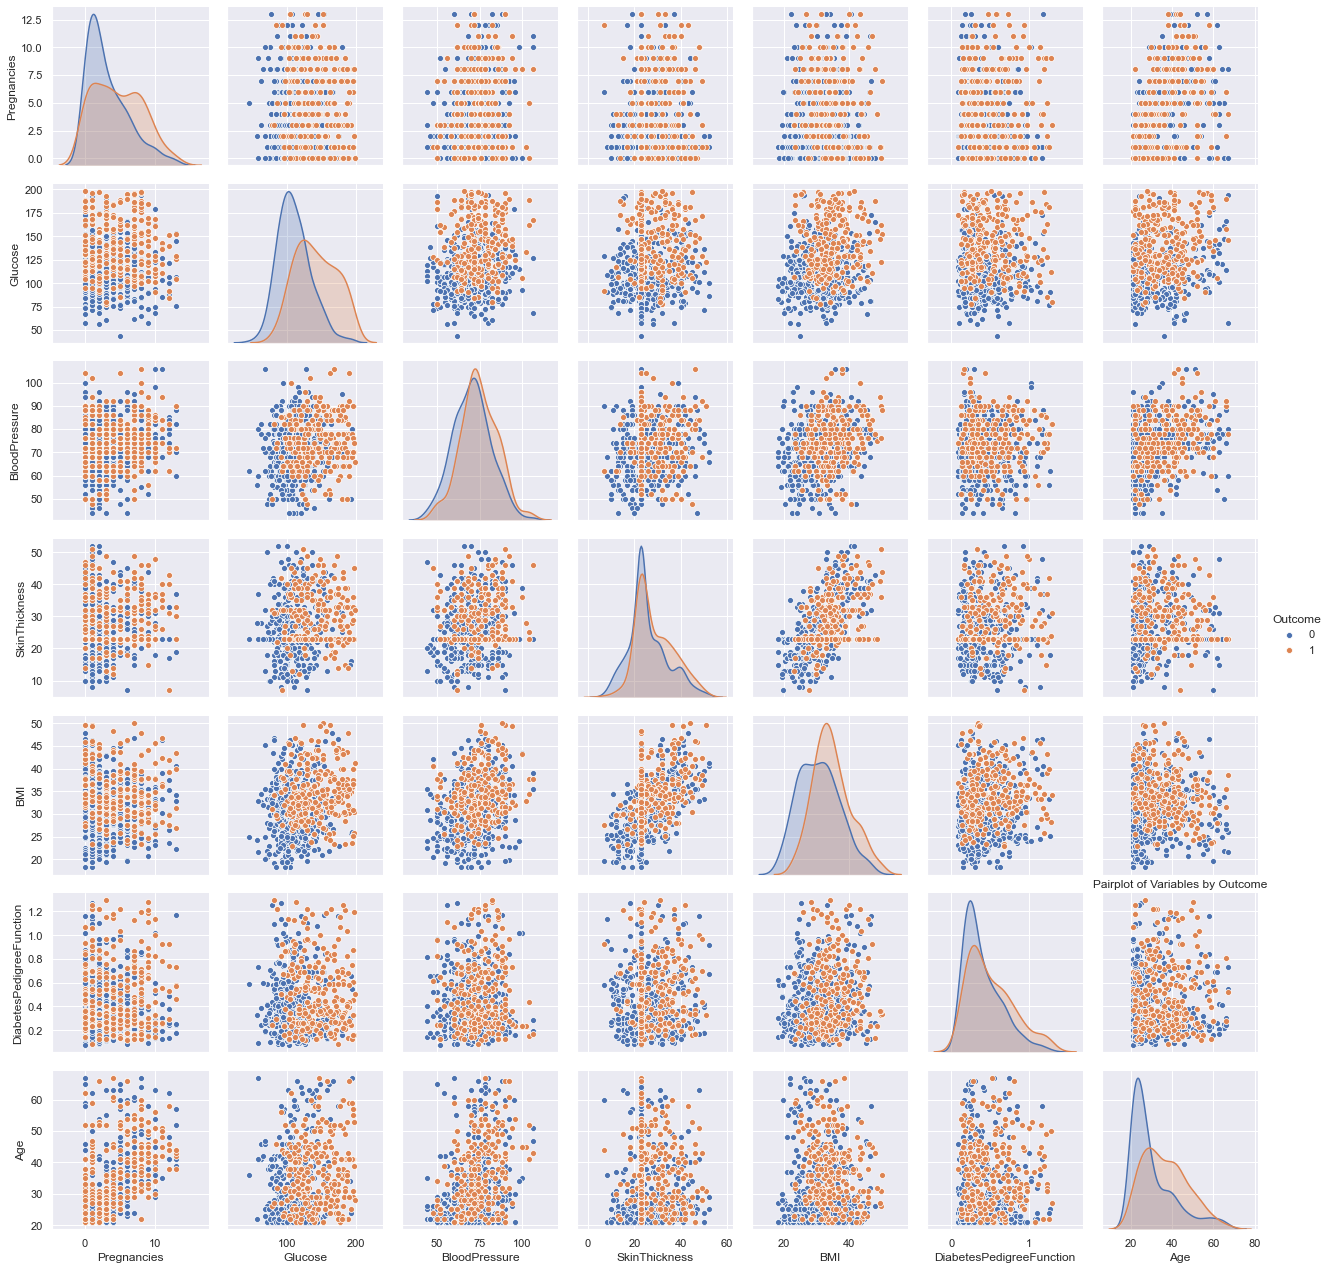

In [138]:
sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")
plt.show()


# Correlation matrix

In [134]:
cor = df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127735,0.220141,0.062825,0.031384,0.007021,0.555218,0.220017
Glucose,0.127735,1.000000,0.208473,0.132520,0.213597,0.079989,0.281511,0.500479
BloodPressure,0.220141,0.208473,1.000000,0.165221,0.279225,0.021154,0.345333,0.181844
SkinThickness,0.062825,0.132520,0.165221,1.000000,0.558734,0.094793,0.050341,0.175154
BMI,0.031384,0.213597,0.279225,0.558734,1.000000,0.133516,0.052464,0.294214
DiabetesPedigreeFunction,0.007021,0.079989,0.021154,0.094793,0.133516,1.000000,0.045939,0.195592
Age,0.555218,0.281511,0.345333,0.050341,0.052464,0.045939,1.000000,0.266445
Outcome,0.220017,0.500479,0.181844,0.175154,0.294214,0.195592,0.266445,1.000000


# Plotting the heatmap

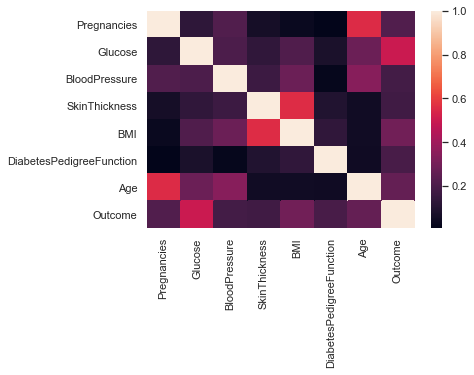

In [136]:
sns.heatmap(cor)